1.0
epoch value: 500
theta1: 0.953353
theta0: 0.168409
epoch value: 1000
theta1: 0.969437
theta0: 0.110343
epoch value: 1500
theta1: 0.979975
theta0: 0.0722978
epoch value: 2000
theta1: 0.986879
theta0: 0.0473703
epoch value: 2500
theta1: 0.991403
theta0: 0.0310376
[  2.58115027e-03   1.10808969e-03   4.75698151e-04   2.04218231e-04
   8.76719278e-05]


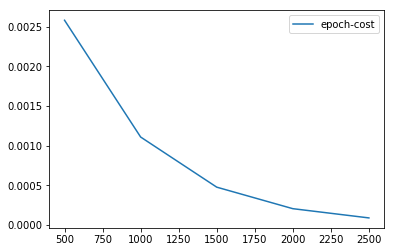

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.constant([1.0,2.0,3.0,4.0,5.0],name='f')

y=tf.constant([1.0,2.0,3.0,4.0,5.0],name='s')
epoch=tf.constant(2500)
z=tf.constant([500.00,1000.00,1500.00,2000.0,2500.0])
lr=0.005
i=0
t1=0.0
t0=0.0
#PART 1
s1=tf.reduce_sum(tf.multiply(tf.subtract(tf.add(tf.multiply(x,t1),t0),y),x))
s0=tf.reduce_sum(tf.subtract(tf.add(tf.multiply(x,t1),t0),y))
tn1=tf.subtract(t1,tf.multiply(lr,tf.divide(s1,tf.cast(tf.size(x),tf.float32))))
tn0=tf.subtract(t0,tf.multiply(lr,tf.divide(s0,tf.cast(tf.size(x),tf.float32))))
threshold=0.001
T=epoch/500
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    output= tf.TensorArray(size=tf.cast(T,tf.int32), dtype=tf.float32)
    #output2 = tf.TensorArray(size=tf.cast(T,tf.int32), dtype=tf.float32)
    for j in range(sess.run(epoch)):
        t1=tn1
        t0=tn0
        s1=tf.reduce_sum(tf.multiply(tf.subtract(tf.add(tf.multiply(x,t1),t0),y),x))
        s0=tf.reduce_sum(tf.subtract(tf.add(tf.multiply(x,t1),t0),y))
        tn1=tf.subtract(t1,tf.multiply(lr,tf.divide(s1,tf.cast(tf.size(x),tf.float32))))
        tn0=tf.subtract(t0,tf.multiply(lr,tf.divide(s0,tf.cast(tf.size(x),tf.float32))))
        if (j+1) % 500 == 0:
            c=0
            print("epoch value:",(j+1))           
            print("theta1:",sess.run(tn1))
            print("theta0:",sess.run(tn0))
            c=tf.divide(tf.reduce_sum(tf.square(tf.subtract(tf.add(tf.multiply(x,tn1),tn0),y))),tf.multiply(2.0,tf.cast(tf.size(x),tf.float32)))
            output= output.write(i, c)
            #output2 = output2.write(i, t0)
            i=i+1
    output_final = output.stack()
    
    #part 2
    print(sess.run(output_final))
    plt.plot(sess.run(z),sess.run(output_final),label='epoch-cost')
    plt.legend()
    plt.show()
    
        

epoch value: 20
theta0: -0.548226
theta1: 1.04707
theta1: -1.45777
error: 0.126118
epoch value: 40
theta0: -0.685125
theta1: 1.24954
theta1: -1.79277
error: 0.0588686
epoch value: 60
theta0: -0.763168
theta1: 1.36984
theta1: -1.98292
error: 0.0381824
epoch value: 80
theta0: -0.817738
theta1: 1.45565
theta1: -2.11612
error: 0.0282092
epoch value: 100
theta0: -0.859645
theta1: 1.52238
theta1: -2.2187
error: 0.0223507
[ 0.12611778  0.05886858  0.03818244  0.02820917  0.0223507 ]


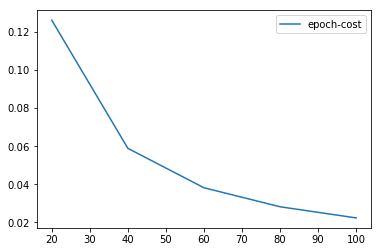

In [1]:


import tensorflow as tf
import matplotlib.pyplot as plt

#LEARNING RATE=0.3

x1=tf.constant([2.7810836,1.465489372,3.396561688,1.38807019,3.06407232,7.627531214,5.332441248,6.922596716,8.675418651,7.673756466],name='f')
x2=tf.constant([2.550537003,2.362125076,4.400293529,1.850220317,3.005305973,2.759262235,2.088626775,1.77106367,-0.242068655,3.508563011],name='s')
y=tf.constant([0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0],name='o')
epoch=tf.constant(100)
z=tf.constant([20.0,40.0,60.0,80.0,100.0])
lr=0.3
k=0
l=0
t0=0.0
t1=0.0
t2=0.0
#PART 1

T=epoch/20
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    output= tf.TensorArray(size=tf.cast(T,tf.int32), dtype=tf.float32)
    theta=tf.TensorArray(size=3,dtype=tf.float32)
    #output2 = tf.TensorArray(size=tf.cast(T,tf.int32), dtype=tf.float32)
    for j in range(sess.run(epoch)):
        sum_err=0
        for i in range(sess.run(tf.size(x1))):
            yhat=1.0/(1.0+tf.exp(-t0-(t1*x1[i])-(t2*x2[i])))
            error=y[i]-yhat
            sum_err=sum_err+tf.square(error)
            t0 = t0 + lr* error * yhat * (1.0 - yhat)
            theta= theta.write(l, t0)
            t1 = t1 + lr* error * yhat * (1.0 - yhat)*x1[i]
            theta= theta.write(l+1, t1)
            t2 = t2 + lr* error * yhat * (1.0 - yhat)*x2[i]
            theta= theta.write(l+2, t2)
        if (j+1) % 20 == 0:
            print("epoch value:",(j+1))
            print("theta0:",sess.run(t0))
            print("theta1:",sess.run(t1))
            print("theta1:",sess.run(t2))
            print("error:",sess.run(sum_err))
            output= output.write(k, sum_err)
            #output2 = output2.write(i, t0)
            k=k+1
    output_final = output.stack()
    
    #part 2
    print(sess.run(output_final))
    plt.plot(sess.run(z),sess.run(output_final),label='epoch-cost')
    plt.legend()
    plt.show()
        